In [64]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt
import seaborn
import scipy.stats as sst
%matplotlib inline  
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12.0, 10.0)
seaborn.set_context("paper", font_scale=2.4)


In [57]:
pwd

u'/home/yusixie/Dropbox/machine_learning/simulation/dc_simulation'

In [65]:
noAdv_baseline = pd.read_csv('result/baseline/noAdv_baseline.csv')
withAdv_baseline = pd.read_csv('result/baseline/withAdv_baseline.csv')
baseline = pd.concat([noAdv_baseline, withAdv_baseline], axis=0)
baseline = baseline[baseline['whiteNode'].isin([False])]

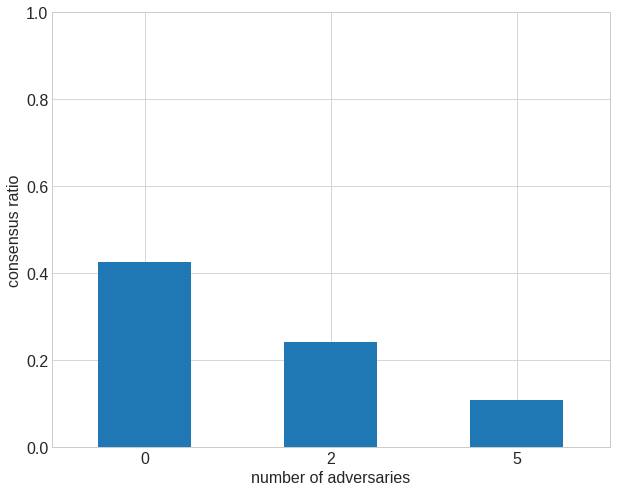

In [74]:

baseline.groupby('numAdversarialNodes')['consensus'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('number of adversaries')
plt.ylim([0, 1])
plt.savefig('result/figure/baseline_#adversaries.png')

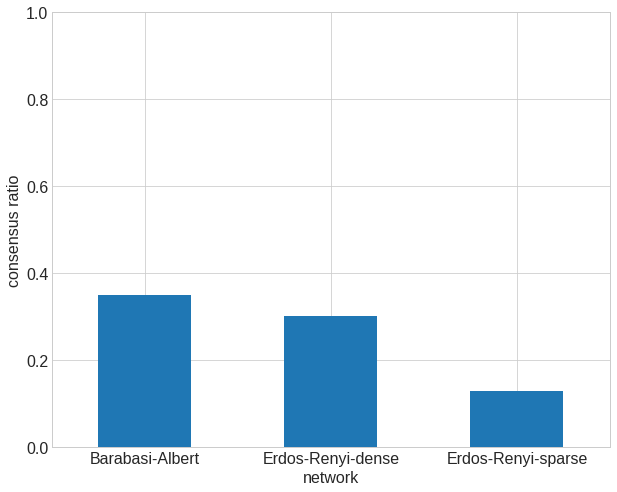

In [75]:

baseline.groupby('network')['consensus'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('network')
plt.ylim([0, 1])
plt.savefig('result/figure/baseline_network.png')

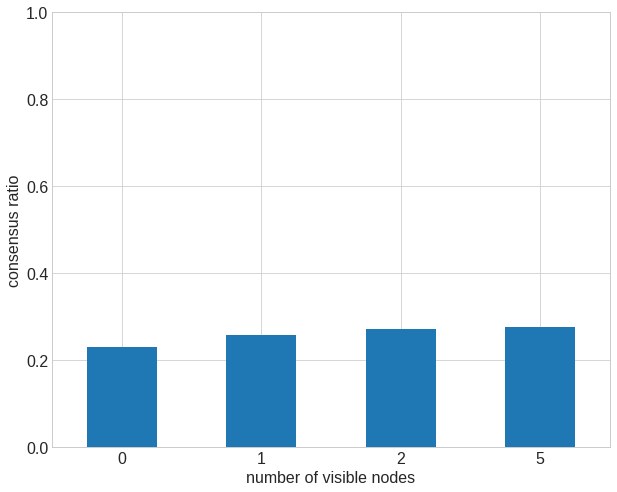

In [76]:
baseline.groupby('numVisibleNodes')['consensus'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('number of visible nodes')
plt.ylim([0, 1])
plt.savefig('result/figure/baseline_#visible.png')

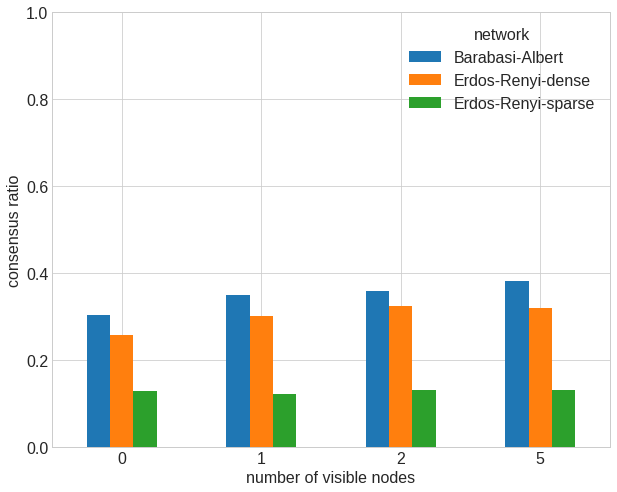

In [77]:
baseline.groupby(['network', 'numVisibleNodes'])['consensus'].mean().unstack(level=0).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('number of visible nodes')
plt.ylim([0, 1])
plt.savefig('result/figure/baseline_#visibleAndNetwork.png')

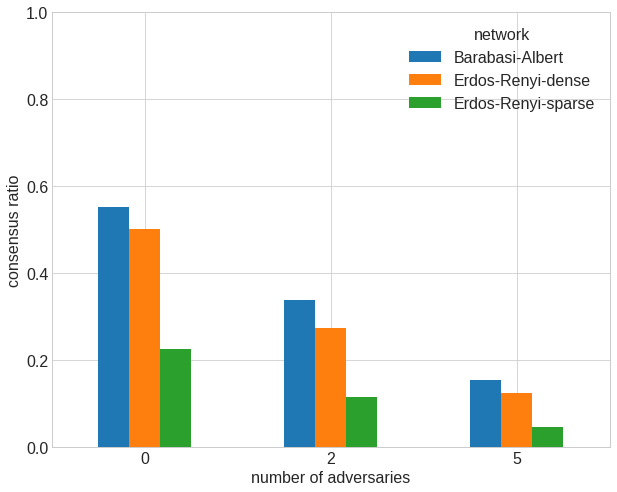

In [78]:
baseline.groupby(['network', 'numAdversarialNodes'])['consensus'].mean().unstack(level=0).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('number of adversaries')
plt.ylim([0, 1])
plt.savefig('result/figure/baseline_#adversariesAndNetwork.png')

In [52]:
withAdv_baseline = pd.read_csv('result/baseline/withAdv_baseline.csv')
withAdv_baseline = withAdv_baseline[withAdv_baseline['whiteNode'].isin([False])]
withAdv_baseline_consensusRatio = withAdv_baseline['consensus'].mean()

noAdv_baseline = pd.read_csv('result/baseline/noAdv_baseline.csv')
noAdv_baseline = noAdv_baseline[noAdv_baseline['whiteNode'].isin([False])]
noAdv_baseline_consensusRatio = noAdv_baseline['consensus'].mean()

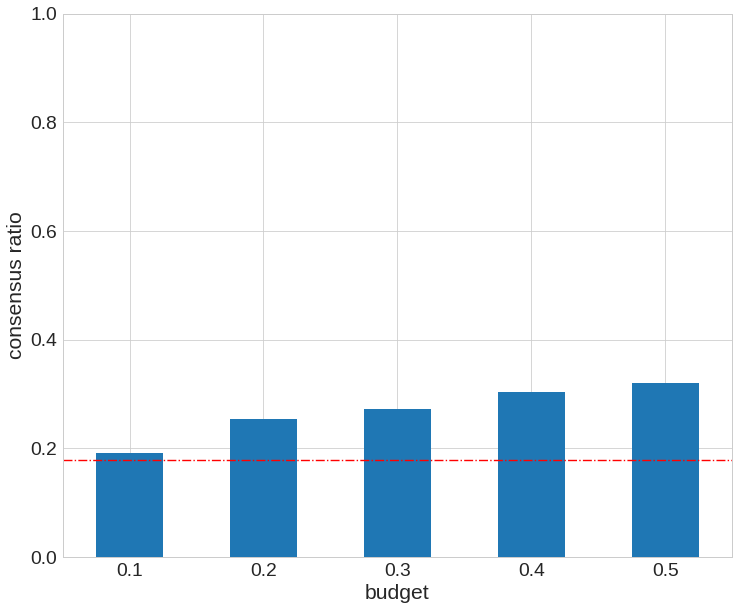

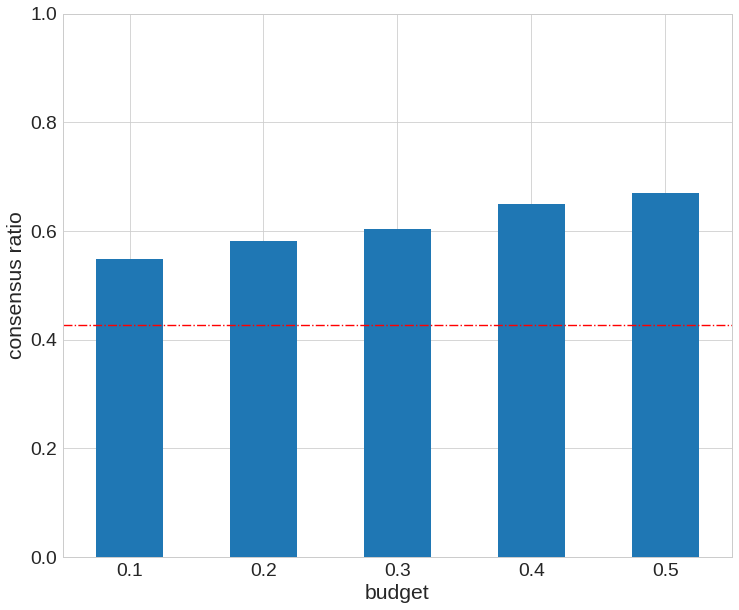

In [53]:
with open('result/withAdv_L1Norm_coordinateDescent.p', 'rb') as fid:
    L1Norm_data = pickle.load(fid)
L1Norm_data = {item[0]: item[2] for item in L1Norm_data if item[0] <= 0.5}

plt.figure()
pd.DataFrame(L1Norm_data, index=L1Norm_data.keys()).transpose()[0.4].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('budget')
plt.ylim([0, 1])
plt.axhline(y=withAdv_baseline_consensusRatio, color='r', linestyle='-.')
plt.savefig('result/figure/withAdv_changeCoeff_L1Norm.png')


with open('result/noAdv_L1Norm_coordinateDescent.p', 'rb') as fid:
    L1Norm_data = pickle.load(fid)
L1Norm_data = {item[0]: item[2] for item in L1Norm_data if item[0] <= 0.5}

plt.figure()
pd.DataFrame(L1Norm_data, index=L1Norm_data.keys()).transpose()[0.4].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('budget')
plt.ylim([0, 1])
plt.axhline(y=noAdv_baseline_consensusRatio, color='r', linestyle='-.')
plt.savefig('result/figure/noAdv_changeCoeff_L1Norm.png')

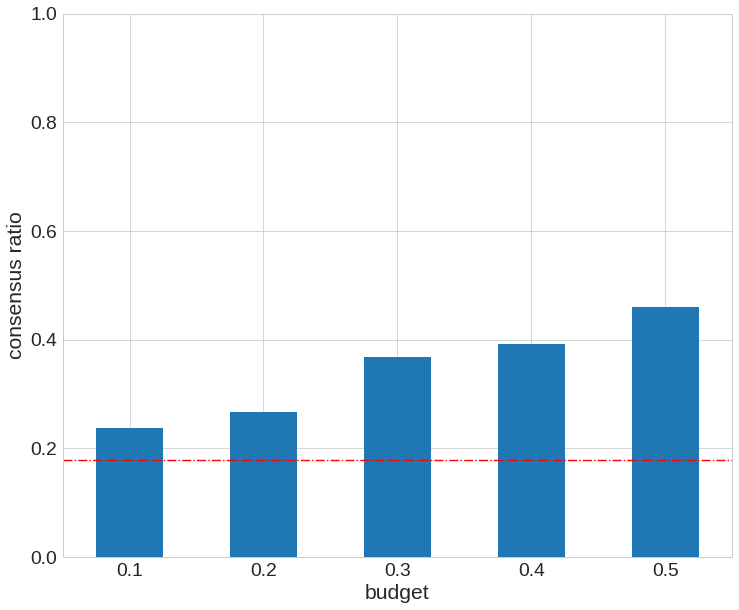

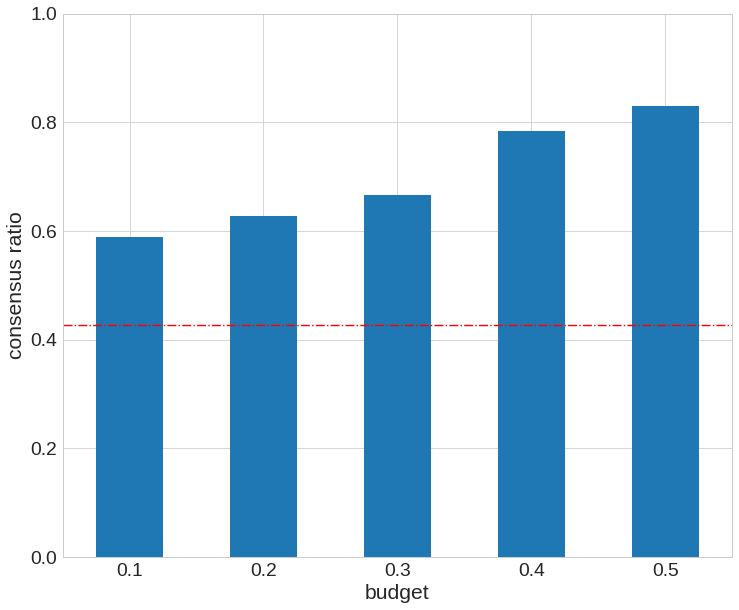

In [106]:
with open('result/withAdv_infinityNorm_coordinateDescent.p', 'rb') as fid:
    infinityNorm_data = pickle.load(fid)
infinityNorm_data = {item[0]: item[2] for item in infinityNorm_data if item[0] <= 0.5}

plt.figure()
pd.DataFrame(infinityNorm_data, index=infinityNorm_data.keys()).transpose()[0.4].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('budget')
plt.ylim([0, 1])
plt.axhline(y=withAdv_baseline_consensusRatio, color='r', linestyle='-.')
plt.savefig('result/figure/withAdv_changeCoeff_infinityNorm.png')

with open('result/withAdv_infinityNorm_coordinateDescent.p', 'rb') as fid:
    infinityNorm_data = pickle.load(fid)
regularNodeAmplifier = [np.asarray(item[-2]).squeeze() for item in infinityNorm_data]
visibleNodeAmplifier = [np.asarray(item[-1]).squeeze() for item in infinityNorm_data]

regularNodeAmplifier = pd.DataFrame(regularNodeAmplifier).transpose()
regularNodeAmplifier.columns = [0.1, 0.2, 0.3, 0.4, 0.5]
regularNodeAmplifier['original_coefficients'] = [-3.75, 0, 1.12, 1.4, -0.85, 0, 0, 0, -3.94, 0.004, 2.47, 0, -0.51, 0, 0, 0]
# regularNodeAmplifier.to_csv('result/withAdv_infinityNorm_regularPlaer_coefficientChange.csv', index=None)
regularNodeAmplifier.iloc[:8, :].to_csv('result/withAdv_infinityNorn_regularPlayer_neighborHasVisible_coefficientChange.csv', index=None)
regularNodeAmplifier.iloc[8:, :].to_csv('result/withAdv_infinityNorn_regularPlayer_neighborHasNoVisible_coefficientChange.csv', index=None)

visibleNodeAmplifier = pd.DataFrame(visibleNodeAmplifier).transpose()
visibleNodeAmplifier.columns = [0.1, 0.2, 0.3, 0.4, 0.5]
visibleNodeAmplifier['original_coefficients'] = [-3.75, 0, 1.12, 1.4, -0.85, 0, 0, 0, -3.94, 0.004, 2.47, 0, -0.51, 0, 0, 0]
# regularNodeAmplifier.to_csv('result/withAdv_infinityNorm_regularPlaer_coefficientChange.csv', index=None)
visibleNodeAmplifier.iloc[:8, :].to_csv('result/withAdv_infinityNorn_visiblePlayer_neighborHasVisible_coefficientChange.csv', index=None)
visibleNodeAmplifier.iloc[8:, :].to_csv('result/withAdv_infinityNorn_visiblePlayer_neighborHasNoVisible_coefficientChange.csv', index=None)




with open('result/noAdv_infinityNorm_coordinateDescent.p', 'rb') as fid:
    infinityNorm_data = pickle.load(fid)
infinityNorm_data = {item[0]: item[2] for item in infinityNorm_data if item[0] <= 0.5}

plt.figure()
pd.DataFrame(infinityNorm_data, index=infinityNorm_data.keys()).transpose()[0.4].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.xlabel('budget')
plt.ylim([0, 1])
plt.axhline(y=noAdv_baseline_consensusRatio, color='r', linestyle='-.')
plt.savefig('result/figure/noAdv_changeCoeff_infinityNorm.png')


with open('result/noAdv_infinityNorm_coordinateDescent.p', 'rb') as fid:
    infinityNorm_data = pickle.load(fid)
regularNodeAmplifier = [np.asarray(item[-2]).squeeze() for item in infinityNorm_data]
visibleNodeAmplifier = [np.asarray(item[-1]).squeeze() for item in infinityNorm_data]

regularNodeAmplifier = pd.DataFrame(regularNodeAmplifier).transpose()
regularNodeAmplifier.columns = [0.1, 0.2, 0.3, 0.4, 0.5]
regularNodeAmplifier['original_coefficients'] = [-3.75, 0, 1.12, 1.4, -0.85, 0, 0, 0, -3.94, 0.004, 2.47, 0, -0.51, 0, 0, 0]
# regularNodeAmplifier.to_csv('result/withAdv_infinityNorm_regularPlaer_coefficientChange.csv', index=None)
regularNodeAmplifier.iloc[:8, :].to_csv('result/noAdv_infinityNorn_regularPlayer_neighborHasVisible_coefficientChange.csv', index=None)
regularNodeAmplifier.iloc[8:, :].to_csv('result/noAdv_infinityNorn_regularPlayer_neighborHasNoVisible_coefficientChange.csv', index=None)



visibleNodeAmplifier = pd.DataFrame(visibleNodeAmplifier).transpose()
visibleNodeAmplifier.columns = [0.1, 0.2, 0.3, 0.4, 0.5]
visibleNodeAmplifier['original_coefficients'] = [-3.75, 0, 1.12, 1.4, -0.85, 0, 0, 0, -3.94, 0.004, 2.47, 0, -0.51, 0, 0, 0]
visibleNodeAmplifier.to_csv('result/noAdv_infinityNorm_regularPlaer_coefficientChange.csv', index=None)
visibleNodeAmplifier.iloc[:8, :].to_csv('result/noAdv_infinityNorn_visiblePlayer_neighborHasVisible_coefficientChange.csv', index=None)
visibleNodeAmplifier.iloc[8:, :].to_csv('result/noAdv_infinityNorn_visiblePlayer_neighborHasNoVisible_coefficientChange.csv', index=None)


Ttest_indResult(statistic=8.207921330621943, pvalue=2.2549532172418475e-16)
Ttest_indResult(statistic=-0.89148504243841464, pvalue=0.3726694961763658)
Ttest_indResult(statistic=1.727274564804739, pvalue=0.084119062384196003)


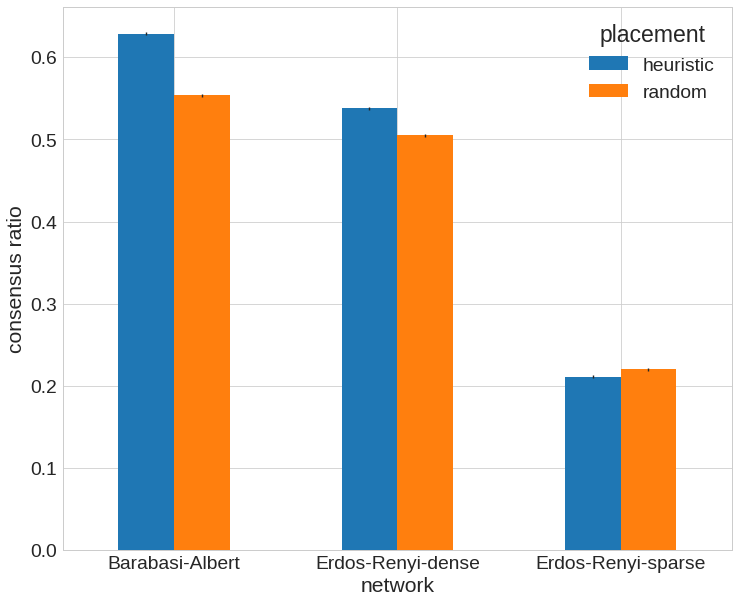

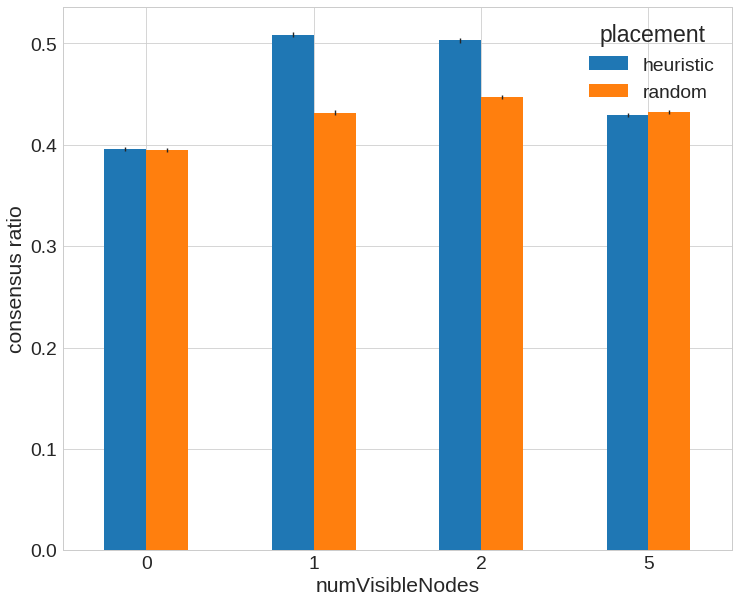

In [94]:
noAdv_baseline['placement'] = pd.Series(['random'] * len(noAdv_baseline))
noAdv_placement = pd.read_csv('result/placement/noAdv_visibleOpt.csv', sep=',')
noAdv_placement['placement'] = pd.Series(['heuristic'] * len(noAdv_placement))
noAdv_data = pd.concat([noAdv_baseline, noAdv_placement], axis=0)

# remove invalid games
# noAdv_data.head()
noAdv_data = noAdv_data[noAdv_data['whiteNode'].isin([False])]
error = noAdv_data.groupby(['placement', 'network'])['consensus'].sem().unstack(level=0) * 1.96
noAdv_data.groupby(['placement', 'network'])['consensus'].mean().unstack(level=0).plot(kind='bar', yerr=error)
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.savefig('result/figure/noAdv_placement_network.png')

error = noAdv_data.groupby(['placement', 'numVisibleNodes'])['consensus'].sem().unstack(level=0) * 1.96
noAdv_data.groupby(['placement', 'numVisibleNodes'])['consensus'].mean().unstack(level=0).plot(kind='bar', yerr=error)
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.savefig('result/figure/noAdv_placement_visibleNodes.png')


a = noAdv_data[noAdv_data['placement'].isin(['random']) & noAdv_data['network'].isin(['Erdos-Renyi-sparse'])]
b = noAdv_data[noAdv_data['placement'].isin(['heuristic']) & noAdv_data['network'].isin(['Erdos-Renyi-sparse'])]
print sst.ttest_ind(a['consensus'], b['consensus'])

a = noAdv_data[noAdv_data['placement'].isin(['random']) & noAdv_data['numVisibleNodes'].isin([0])]
b = noAdv_data[noAdv_data['placement'].isin(['heuristic']) & noAdv_data['numVisibleNodes'].isin([0])]
print sst.ttest_ind(a['consensus'], b['consensus'])

a = noAdv_data[noAdv_data['placement'].isin(['random']) & noAdv_data['numVisibleNodes'].isin([5])]
b = noAdv_data[noAdv_data['placement'].isin(['heuristic']) & noAdv_data['numVisibleNodes'].isin([5])]
print sst.ttest_ind(a['consensus'], b['consensus'])

# noAdv_data.head()

Ttest_indResult(statistic=0.78158620467059592, pvalue=0.43445800699205572)
Ttest_indResult(statistic=-3.8404635080656901, pvalue=0.00012281082121658513)


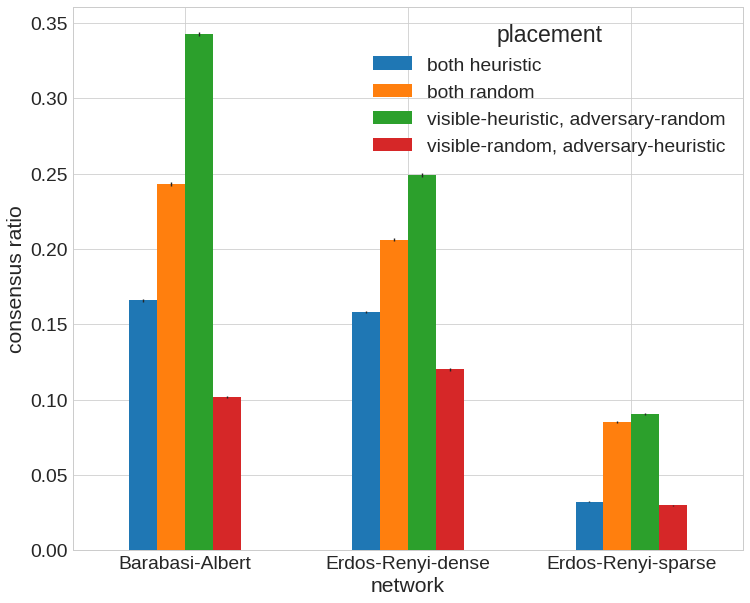

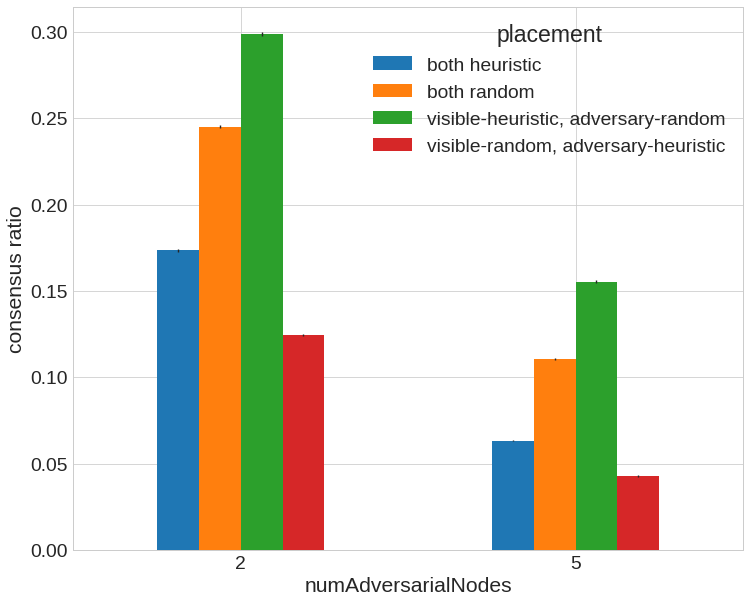

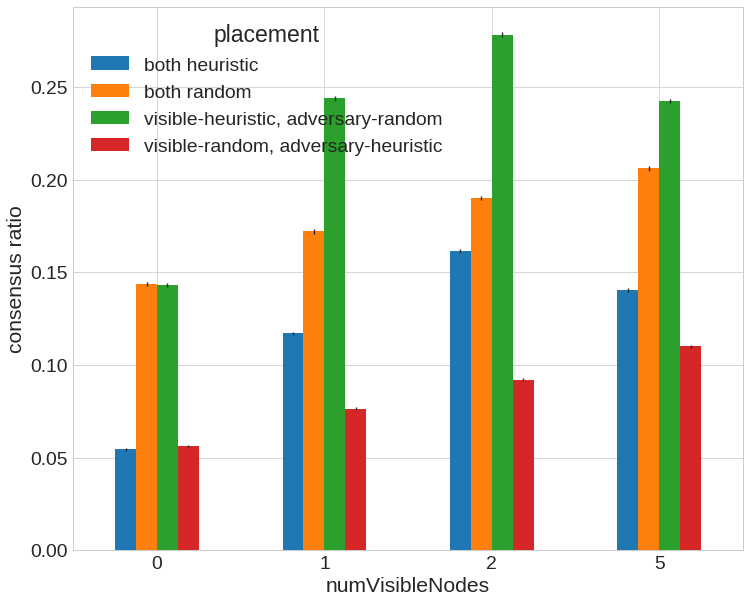

In [96]:
withAdv_baseline['placement'] = pd.Series(['both random'] * len(withAdv_baseline))

withAdv_bothOpt = pd.read_csv('result/placement/withAdv_bothOpt.csv', sep=',')
withAdv_bothOpt['placement'] = pd.Series(['both heuristic'] * len(withAdv_bothOpt))

withAdv_visibleRandom_advOpt = pd.read_csv('result/placement/withAdv_visibleRandom_adversaryOpt.csv', sep=',')
withAdv_visibleRandom_advOpt['placement'] = pd.Series(['visible-random, adversary-heuristic'] * len(withAdv_visibleRandom_advOpt))  

withAdv_visibleOpt_advRandom = pd.read_csv('result/placement/withAdv_visibleOpt_adversaryRandom.csv', sep=',')
withAdv_visibleOpt_advRandom['placement'] = pd.Series(['visible-heuristic, adversary-random'] * len(withAdv_visibleRandom_advOpt))                                    


withAdv_data = pd.concat([withAdv_baseline, withAdv_visibleRandom_advOpt, withAdv_visibleOpt_advRandom, withAdv_bothOpt], axis=0)
withAdv_data = withAdv_data[withAdv_data['whiteNode'].isin([False])]

error = withAdv_data.groupby(['placement', 'network'])['consensus'].sem().unstack(level=0) * 1.96
withAdv_data.groupby(['placement', 'network'])['consensus'].mean().unstack(level=0).plot(kind='bar', yerr=error)
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.savefig('result/figure/withAdv_placement_network.png')


error = withAdv_data.groupby(['placement', 'numAdversarialNodes'])['consensus'].sem().unstack(level=0) * 1.96
withAdv_data.groupby(['placement', 'numAdversarialNodes'])['consensus'].mean().unstack(level=0).plot(kind='bar', yerr=error)
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.savefig('result/figure/withAdv_placement_adversarialNodes.png')



error = withAdv_data.groupby(['placement', 'numVisibleNodes'])['consensus'].sem().unstack(level=0) * 1.96
withAdv_data.groupby(['placement', 'numVisibleNodes'])['consensus'].mean().unstack(level=0).plot(kind='bar', yerr=error)
plt.xticks(rotation=0)
plt.ylabel('consensus ratio')
plt.savefig('result/figure/withAdv_placement_visibleNodes.png')

a = withAdv_data[withAdv_data['numVisibleNodes'].isin([0]) & withAdv_data['placement'].isin(['both random'])]
b = withAdv_data[withAdv_data['numVisibleNodes'].isin([0]) & withAdv_data['placement'].isin(['visible-heuristic, adversary-random'])]
print sst.ttest_ind(a['consensus'], b['consensus'])

a = withAdv_data[withAdv_data['numVisibleNodes'].isin([0]) & withAdv_data['placement'].isin(['both heuristic'])]
b = withAdv_data[withAdv_data['numVisibleNodes'].isin([0]) & withAdv_data['placement'].isin(['visible-random, adversary-heuristic'])]
print sst.ttest_ind(a['consensus'], b['consensus'])


In [ ]:
with open('result/noAdv_infinityNorm_coordinateDescent.p') as fid:
    data = pickle.load(fid)
    
ret = []
for item in data:
    tmp = np.concatenate([item[-2], item[-1]])   
    tmp = np.asarray(tmp).squeeze()
    ret.append(tmp)
ret = pd.DataFrame(ret).transpose()
ret.columns = [0.1, 0.2, 0.3, 0.4, 0.5]
ret.to_csv('result/noAdv_infinityNorm.csv', sep=',', index=None)
